## Library

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 경로
data_path = '/kaggle/input/cat-in-the-dat/'
train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

## EDA
* train  
  bin_0: 수치형 0/1  
  bin_1: 수치형 0/1  
  bin_2: 수치형 0/1  
  bin_3: 수치형 T/F  
  bin_4: 수치형 Y/N  
  nom_0\~4: 텍스트 단어 unique 3개 or 6개  
  nom_5\~9: 텍스트 문장 unique 100개 이상  
  ord_0: 순서형 숫자 1/2/3  
  ord_1\~5: 순서형 문자  
  day: 요일 1\~7  
  month: 월 1\~12  
  target: 0/1
    
* test  
  target빼고 구성 동일

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 22  m

In [5]:
train.sample(3).T

id,68672,274158,93758
bin_0,0,0,0
bin_1,0,0,1
bin_2,0,0,0
bin_3,T,F,T
bin_4,Y,Y,N
nom_0,Green,Green,Blue
nom_1,Square,Star,Trapezoid
nom_2,Lion,Lion,Axolotl
nom_3,Costa Rica,Russia,Russia
nom_4,Piano,Piano,Piano


In [6]:
train.isnull().sum()

bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [7]:
train['ord_5'].unique()

array(['kr', 'bF', 'Jc', 'kW', 'qP', 'PZ', 'wy', 'Ed', 'qo', 'CZ', 'qX',
       'su', 'dP', 'aP', 'MV', 'oC', 'RL', 'fh', 'gJ', 'Hj', 'TR', 'CL',
       'Sc', 'eQ', 'kC', 'qK', 'dh', 'gM', 'Jf', 'fO', 'Eg', 'KZ', 'Vx',
       'Fo', 'sV', 'eb', 'YC', 'RG', 'Ye', 'qA', 'lL', 'Qh', 'Bd', 'be',
       'hT', 'lF', 'nX', 'kK', 'av', 'uS', 'Jt', 'PA', 'Er', 'Qb', 'od',
       'ut', 'Dx', 'Xi', 'on', 'Dc', 'sD', 'rZ', 'Uu', 'sn', 'yc', 'Gb',
       'Kq', 'dQ', 'hp', 'kL', 'je', 'CU', 'Fd', 'PQ', 'Bn', 'ex', 'hh',
       'ac', 'rp', 'dE', 'oG', 'oK', 'cp', 'mm', 'vK', 'ek', 'dO', 'XI',
       'CM', 'Vf', 'aO', 'qv', 'jp', 'Zq', 'Qo', 'DN', 'TZ', 'ke', 'cG',
       'tP', 'ud', 'tv', 'aM', 'xy', 'lx', 'To', 'uy', 'ZS', 'vy', 'ZR',
       'AP', 'GJ', 'Wv', 'ri', 'qw', 'Xh', 'FI', 'nh', 'KR', 'dB', 'BE',
       'Bb', 'mc', 'MC', 'tM', 'NV', 'ih', 'IK', 'Ob', 'RP', 'dN', 'us',
       'dZ', 'yN', 'Nf', 'QM', 'jV', 'sY', 'wu', 'SB', 'UO', 'Mx', 'JX',
       'Ry', 'Uk', 'uJ', 'LE', 'ps', 'kE', 'MO', 'k

In [8]:
train.nunique()

bin_0         2
bin_1         2
bin_2         2
bin_3         2
bin_4         2
nom_0         3
nom_1         6
nom_2         6
nom_3         6
nom_4         4
nom_5       222
nom_6       522
nom_7      1220
nom_8      2215
nom_9     11981
ord_0         3
ord_1         5
ord_2         6
ord_3        15
ord_4        26
ord_5       192
day           7
month        12
target        2
dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 300000 to 499999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   200000 non-null  int64 
 1   bin_1   200000 non-null  int64 
 2   bin_2   200000 non-null  int64 
 3   bin_3   200000 non-null  object
 4   bin_4   200000 non-null  object
 5   nom_0   200000 non-null  object
 6   nom_1   200000 non-null  object
 7   nom_2   200000 non-null  object
 8   nom_3   200000 non-null  object
 9   nom_4   200000 non-null  object
 10  nom_5   200000 non-null  object
 11  nom_6   200000 non-null  object
 12  nom_7   200000 non-null  object
 13  nom_8   200000 non-null  object
 14  nom_9   200000 non-null  object
 15  ord_0   200000 non-null  int64 
 16  ord_1   200000 non-null  object
 17  ord_2   200000 non-null  object
 18  ord_3   200000 non-null  object
 19  ord_4   200000 non-null  object
 20  ord_5   200000 non-null  object
 21  day     200000 non-null  int64 
 

In [10]:
test.isnull().sum()

bin_0    0
bin_1    0
bin_2    0
bin_3    0
bin_4    0
nom_0    0
nom_1    0
nom_2    0
nom_3    0
nom_4    0
nom_5    0
nom_6    0
nom_7    0
nom_8    0
nom_9    0
ord_0    0
ord_1    0
ord_2    0
ord_3    0
ord_4    0
ord_5    0
day      0
month    0
dtype: int64

In [11]:
submission.head(5)

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


### Visualization

In [12]:
def ratio_n_count(train, feature, target, bins=10, method='quantile'):
    df = train[[feature, target]]
    # 추가로 더 적어보면서 공부할 예정

In [13]:
def eda_target(data, col, target_col='target', bins=10, method='quantile', is_category=None, grid_ax=None):
    """
    연속형/명목형 컬럼의 EDA + Target Rate 시각화

    - 연속형: binning 후 구성비(%)와 Target Rate 겹쳐서 표시
    - 명목형: 그룹별 Count(%)와 Target Rate 겹쳐서 표시

    Parameters:
        df : pd.DataFrame
        col : 분석할 컬럼
        target_col : Target 컬럼 (0/1)
        bins : 연속형일 때 bin 수
        method : 'quantile' 또는 'uniform'
    """

    df = data[[col, target_col]].copy()

    #문제 해결 코드 추가 (Target 컬럼 문자열 -> 숫자 변환)
    if df[target_col].dtype == object:
        mapping = {'Yes': 1, 'No': 0} # 예시: Yes/No 값이 있다고 가정
        df[target_col] = df[target_col].replace(mapping)
        # 만약 True/False 문자열이라면 {'True': 1, 'False': 0} 등으로 수정 필요

    if grid_ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))
        grid_ax = ax

    if method=='uniform':
        create_bins = lambda x : pd.cut(x, bins=bins)
    else:
        create_bins = lambda x : pd.qcut(x, q=bins, duplicates='drop')
    
    # Bin 생성
    if is_category != True and pd.api.types.is_numeric_dtype(df[col]):
        # 연속형 처리: binning
        df[f'{col}_bin'] = create_bins(df[col])
        df[f'{col}_bin'] = df[f'{col}_bin'].apply(lambda x: x.left)
        group_col = f'{col}_bin'

        # 2) 구간별 Count & Target Rate 계산
        summary = df.groupby(group_col).agg(
            Count=(col, 'count'),
            TargetRate=(target_col, 'mean')
        ).reset_index()

        summary['CountPercent(%)'] = summary['Count'] / summary['Count'].sum() * 100
        summary['TargetRatePercent(%)'] = summary['TargetRate'] * 100

        print(summary.select_dtypes(include='number').astype(int))

        # 3) 그래프 그리기
        # x축
        # x_labels = [interval.left for interval in summary[f'{col}_bin']]
        x_labels = summary[group_col].astype(str).unique().tolist()
        x = range(len(summary))

        # figure 크기
        # plt.figure(figsize=(10,5))

        # Count (막대)
        # plt.bar(x, summary['Count'], color='skyblue', alpha=0.6, label='Count')
        grid_ax.bar(x, summary['CountPercent(%)'], color='skyblue', alpha=0.6, label='Composition (%)')
        grid_ax.set_ylabel('Composition (%)')

        # Target Rate (라인)
        ax2 = grid_ax.twinx()
        ax2.plot(x, summary['TargetRatePercent(%)'], color='red', marker='o', linestyle='-', label='Target Rate (%)')
        ax2.set_ylim(0,100)
        ax2.set_ylabel('Target Rate (%)')

        # x축 구간 라벨
        grid_ax.set_xticks(x)
        grid_ax.set_xticklabels(x_labels)
        grid_ax.set_title(f'{col} - {target_col}')
        # plt.show()

    else:
        # 명목형 처리: 그룹별 Count & Target Rate 계산
        summary = df.groupby([col, target_col]).size().unstack(fill_value=0).stack().reset_index(name='Count')
        summary = summary.pivot_table(index=col, columns=target_col, values='Count').reset_index()
        summary.columns = [col, 'target_0', 'target_1']
        summary['Total'] = summary['target_0'] + summary['target_1']
        summary['CountPercent(%)'] = summary['Total'] / summary['Total'].sum() * 100
        summary['TargetRatePercent(%)'] = summary['target_1'] / summary['Total'] * 100
        
        print(summary.select_dtypes(include='number').astype(int))

        # 3) 그래프 그리기
        x_labels = summary[col].tolist()
        x = range(len(summary))

        # plt.figure(figsize=(10,5))

        # Count (막대)
        grid_ax.bar(x, summary['CountPercent(%)'], color='skyblue', alpha=0.6, label='Composition (%)')
        grid_ax.set_ylabel('Composition (%)')

        # Target Rate (라인)
        ax2 = grid_ax.twinx()
        ax2.plot(x, summary['TargetRatePercent(%)'], color='red', marker='o', linestyle='-', label='Target Rate (%)')
        ax2.set_ylim(0,100)
        ax2.set_ylabel('Target Rate (%)')

        # x축 구간 라벨
        grid_ax.set_xticks(x)
        grid_ax.set_xticklabels(x_labels)
        grid_ax.set_title(f'{col} - {target_col}')

        # plt.show()

   bin_0  target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0      0    181786     79963  261749               87                    30
1      1     26450     11801   38251               12                    30


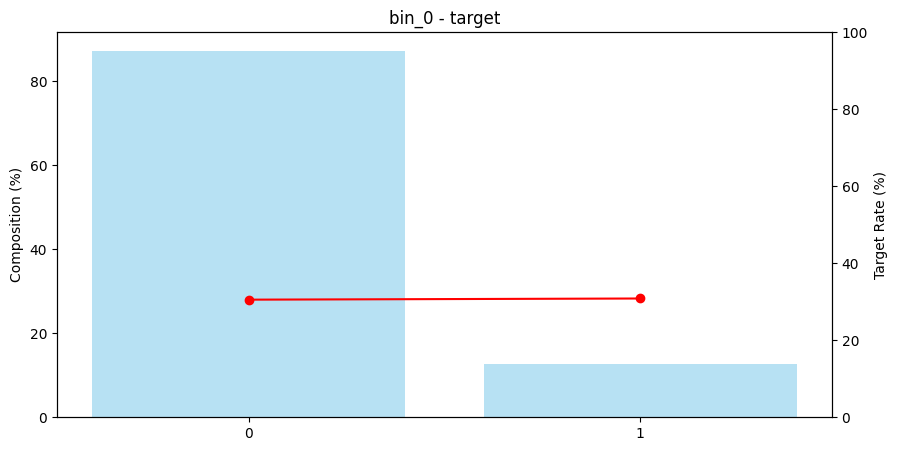

In [14]:
eda_target(train, 'bin_0', target_col='target', bins=10, is_category=True)

   bin_1  target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0      0    149434     73584  223018               74                    32
1      1     58802     18180   76982               25                    23


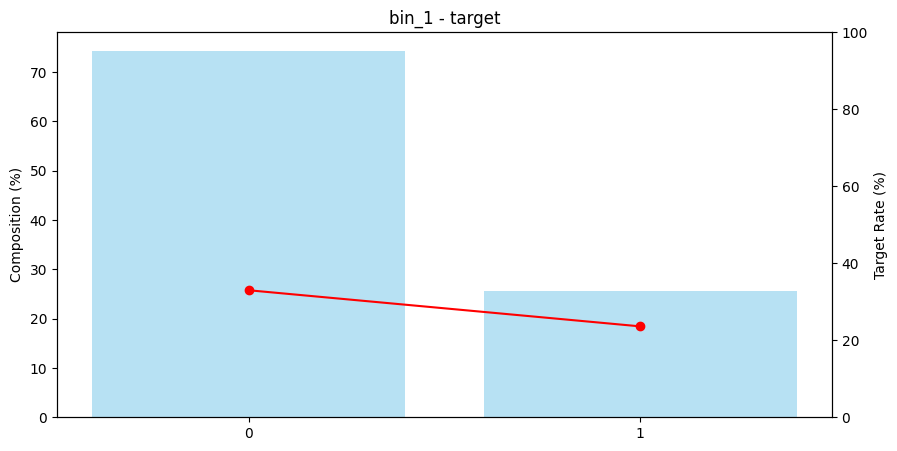

In [15]:
eda_target(train, 'bin_1', target_col='target', bins=10, is_category=True)

   bin_2  target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0      0    129238     55795  185033               61                    30
1      1     78998     35969  114967               38                    31


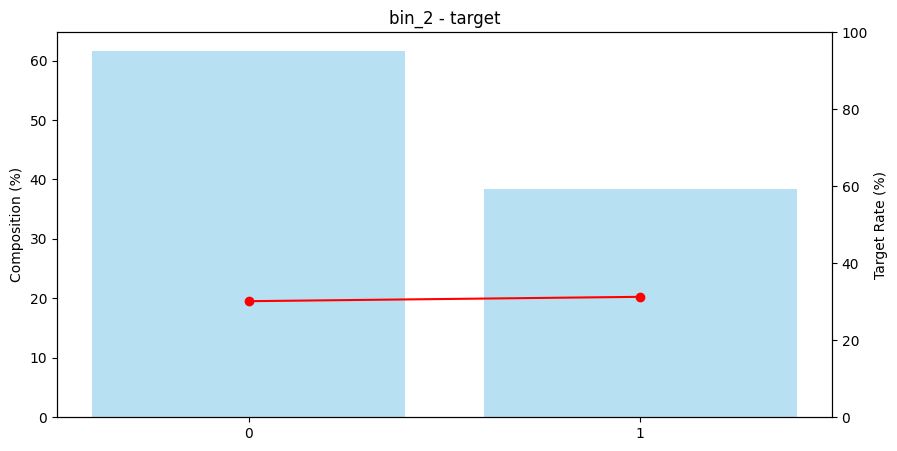

In [16]:
eda_target(train, 'bin_2', target_col='target', bins=10, is_category=True)

   target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0    101151     45314  146465               48                    30
1    107085     46450  153535               51                    30


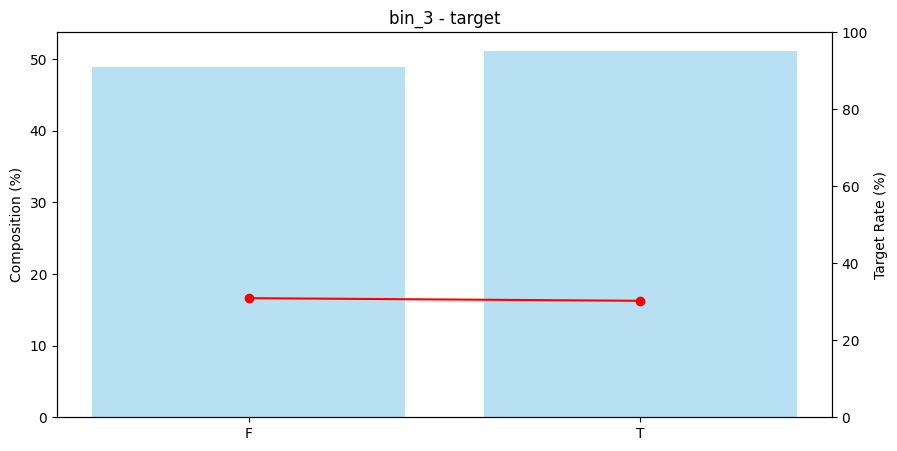

In [17]:
eda_target(train, 'bin_3', target_col='target', bins=10, is_category=True)

   target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0     72197     36170  108367               36                    33
1    136039     55594  191633               63                    29


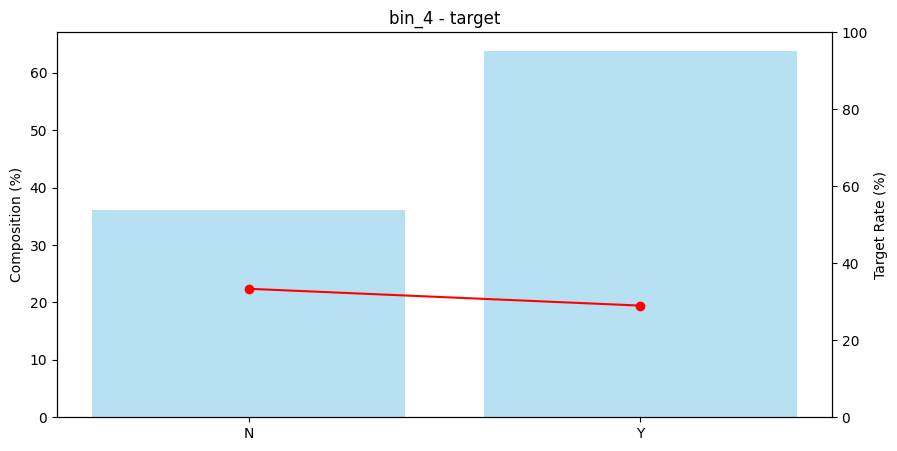

In [18]:
eda_target(train, 'bin_4', target_col='target', bins=10, is_category=True)

In [19]:
cols_to_plot = [f"nom_{i}" for i in range(10)]
print(cols_to_plot)

['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']


   target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0     72914     23252   96166               32                    24
1     85682     41659  127341               42                    32
2     49640     26853   76493               25                    35

   target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0     28152      9168   37320               12                    24
1     24741     11402   36143               12                    31
2     32787     16810   49597               16                    33
3     31645     14259   45904               15                    31
4     71833     29348  101181               33                    29
5     19078     10777   29855                9                    36

   target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0     24608     11528   36136               12                    31
1     33005     16654   49659               16                    33
2     28265      9179   37444   

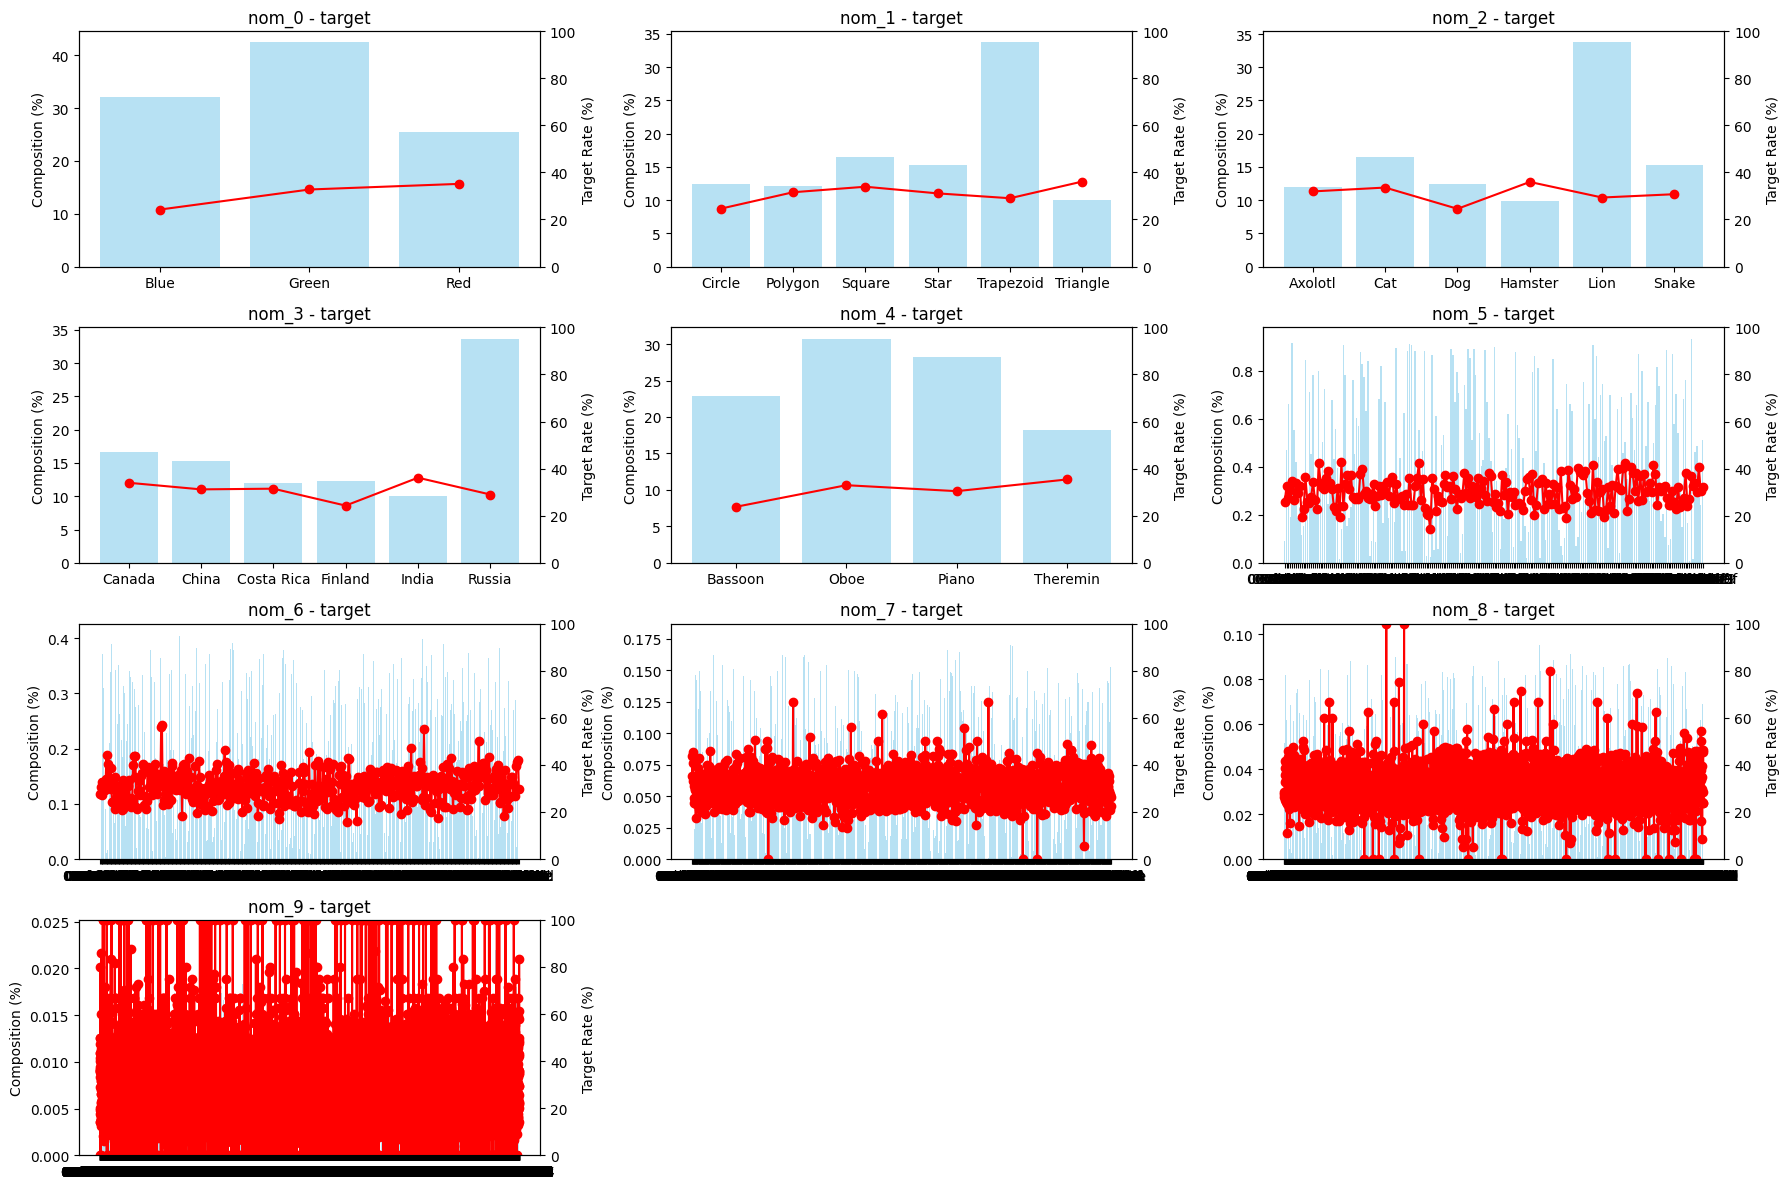

In [20]:
'''
cols_to_plot = []
for i in range(0,9):
    cols_to_plot.append(f"nom_{i}")
'''
cols_to_plot = [f"nom_{n}" for n in range(10)]
rows, cols = 4, 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 3*rows))
axes = axes.flatten()

for i, c in enumerate(cols_to_plot):
    eda_target(train, c, target_col='target', grid_ax=axes[i])
    print()

# 남는 subplot 숨기기
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

   ord_0  target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0      1    140646     54200  194846               64                    27
1      2     44202     22236   66438               22                    33
2      3     23388     15328   38716               12                    39

   target_0  target_1   Total  CountPercent(%)  TargetRatePercent(%)
0     30930     11941   42871               14                    27
1     17115      7950   25065                8                    31
2     46156     31272   77428               25                    40
3     18092      9961   28053                9                    35
4     95943     30640  126583               42                    24

   target_0  target_1  Total  CountPercent(%)  TargetRatePercent(%)
0     38743     21884  60627               20                    36
1     25060      8708  33768               11                    25
2     77336     22480  99816               33                    22
3     14

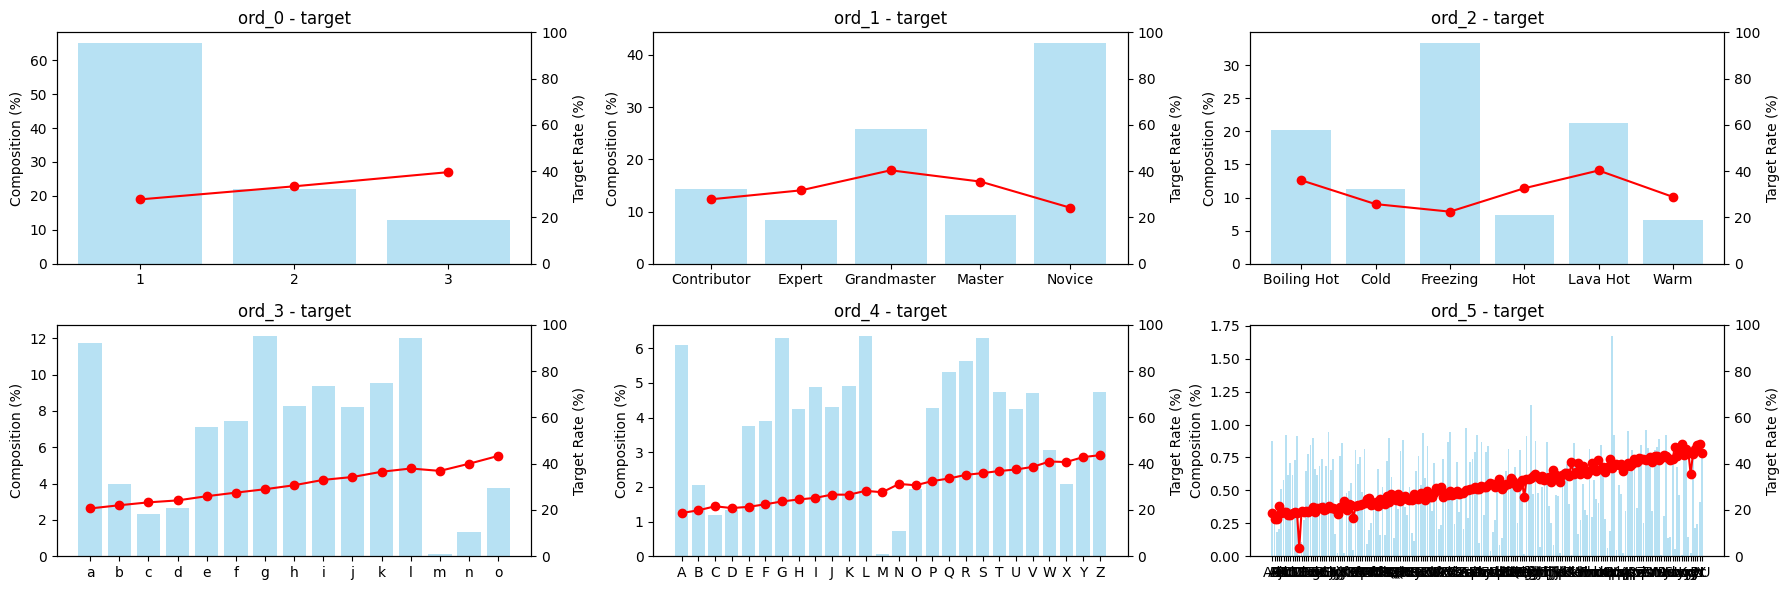

In [21]:
cols_to_plot = [f"ord_{n}" for n in range(6)]
rows, cols = 2, 3

fig, axes = plt.subplots(rows, cols, figsize=(18, 3*rows))
axes = axes.flatten()

for i, c in enumerate(cols_to_plot):
    eda_target(train, c, target_col='target', is_category=True, grid_ax=axes[i])
    print()

# 남는 subplot 숨기기
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

   day  target_0  target_1  Total  CountPercent(%)  TargetRatePercent(%)
0    1     44576     22568  67144               22                    33
1    2     50382     23933  74315               24                    32
2    3     47694     18663  66357               22                    28
3    4     30239     10195  40434               13                    25
4    5     12929      4858  17787                5                    27
5    6       612       300    912                0                    32
6    7     21804     11247  33051               11                    34


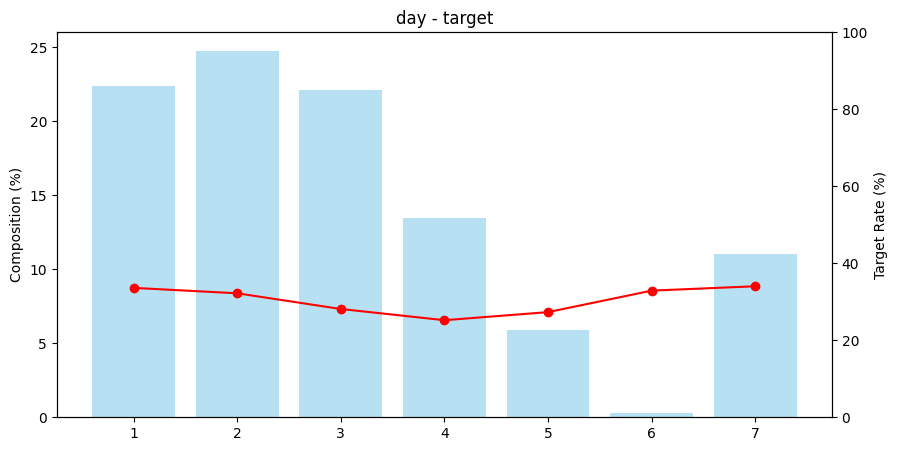

In [22]:
eda_target(train, 'day', target_col='target', is_category=True, bins=10)

    month  target_0  target_1  Total  CountPercent(%)  TargetRatePercent(%)
0       1     30402     10446  40848               13                    25
1       2     34231     11074  45305               15                    24
2       3     29386     11481  40867               13                    28
3       4     17510      7410  24920                8                    29
4       5      7509      3486  10995                3                    31
5       6       351       212    563                0                    37
6       7     13020      6847  19867                6                    34
7       8     12596      6134  18730                6                    32
8       9     16274      8583  24857                8                    34
9      10     14303      7809  22112                7                    35
10     11     16363      9369  25732                8                    36
11     12     16291      8913  25204                8                    35


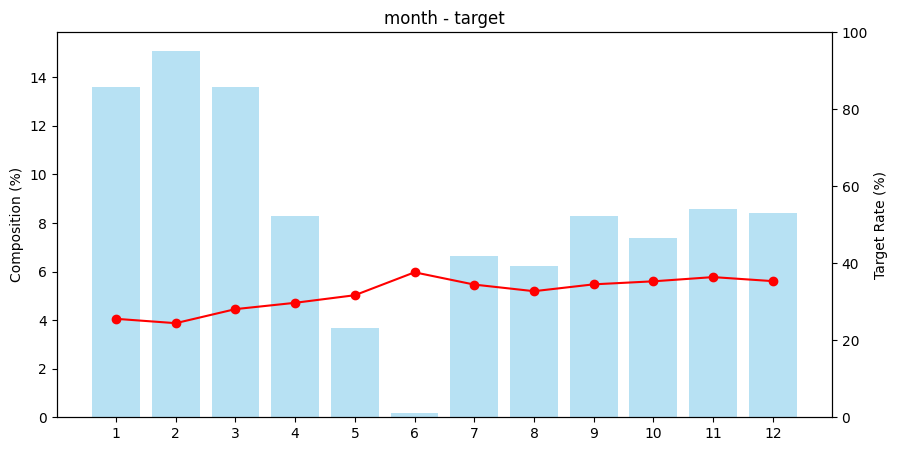

In [23]:
eda_target(train, 'month', target_col='target', is_category=True, bins=10)